## Census Income Data Prediction(Classification Probelm)

### Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

**Prediction task is to determine whether a person makes over 50K a year.**

### Attribute Information:

Listing of attributes:

\>50K, <=50K.

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [67]:
##Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

There are some whitespaces before and after the data values. To trim all the whitespaces we use the separator ‘ *, *’. The test dataset has a weird first line, hence we skip the line using skiprows=1. The missing values in the dataset are indicated by ? so replaced them with nan

In [68]:
## Reading data
columns = ["age", "workClass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
train_data = pd.read_csv('data/adult.data', names=columns, sep=' *, *', na_values='?')
test_data  = pd.read_csv('data/adult.test', names=columns, sep=' *, *', skiprows=1, na_values='?')

In [69]:
train_data.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [70]:
train_data.shape

(32561, 15)

In [71]:
test_data.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [72]:
test_data.shape

(16281, 15)

In [73]:
train_data.isnull().sum()

age                  0
workClass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [74]:
test_data.isnull().sum()

age                 0
workClass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [75]:
raw_data=pd.concat([train_data,test_data]) ## Concatinating both train and test data for easy handling data

In [76]:
raw_data.shape

(48842, 15)

In [77]:
#raw_data.to_csv('../notebook/data/adult.csv')

In [78]:
raw_data.isnull().sum() 

age                  0
workClass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [79]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workClass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


#### Observations

* There are 48842 samples in the combined training and test dataset
* There are both categorical and numerical columns in the dataset
* The columns workClass, occupation, native-country have missing values

Let’s look the numerical and the categorical data with the help of some visualizations.

In [80]:
raw_data.describe(include=object)

,workClass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


In [81]:
num_attributes = raw_data.select_dtypes(include=['int'])
print(num_attributes.columns)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


The variables age, hours-per-week are self-explanatory.

fnlwgt: sampling weight

education-num: number of years of education in total

capital-gain/capital-loss: income from investment sources other than salary/wages

fnlwgt is not related to the target variable income and will be removed before building the model

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

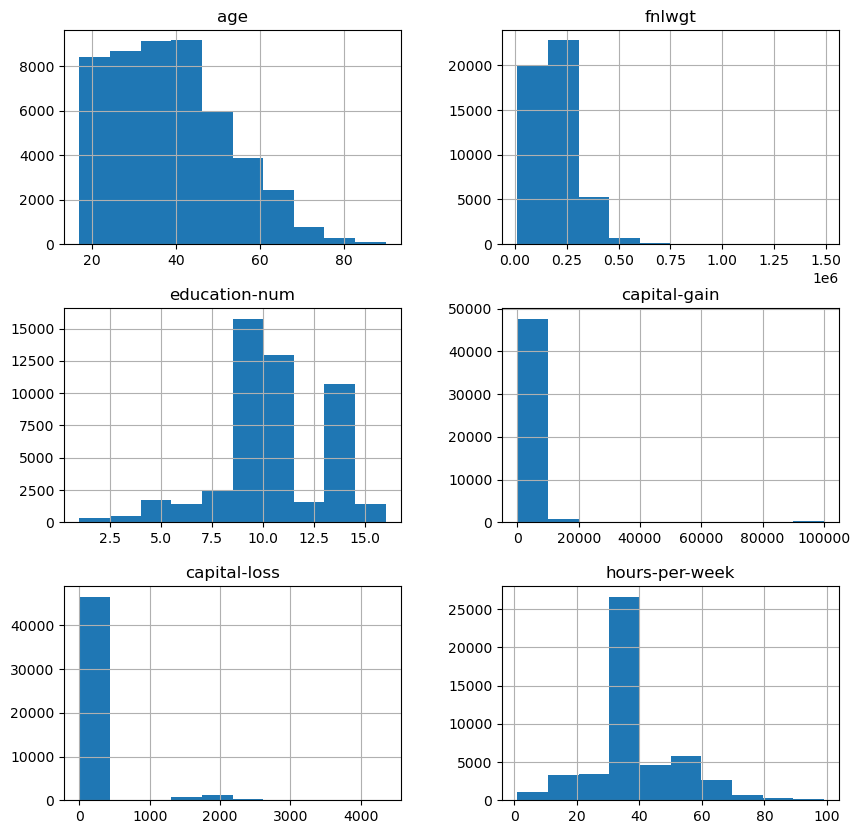

In [82]:
num_attributes.hist(figsize=(10,10))

In [83]:
raw_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


* None of the numerical attributes have missing values
* The values are on different scales. Many machine learning models require the values to be on the same scale. We will use StandardScaler from the sklearn library to scale the features.

In [84]:
cat_attributes = raw_data.select_dtypes(include=['object'])
print(cat_attributes.columns)


Index(['workClass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


<Axes: xlabel='count', ylabel='workClass'>

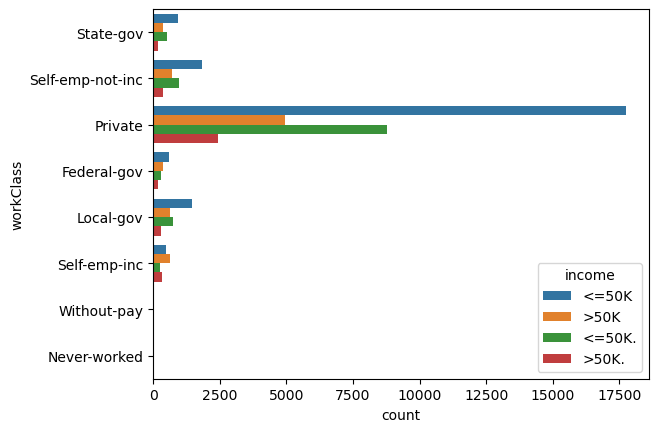

In [85]:
sns.countplot(y='workClass', hue='income', data = cat_attributes)

<Axes: xlabel='count', ylabel='occupation'>

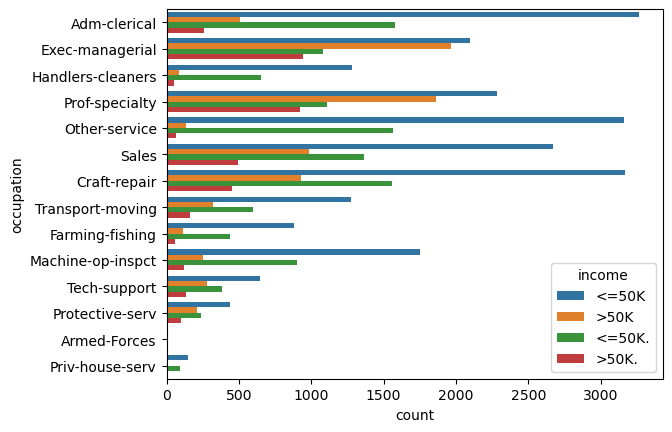

In [86]:
sns.countplot(y='occupation', hue='income', data = cat_attributes)

<Axes: >

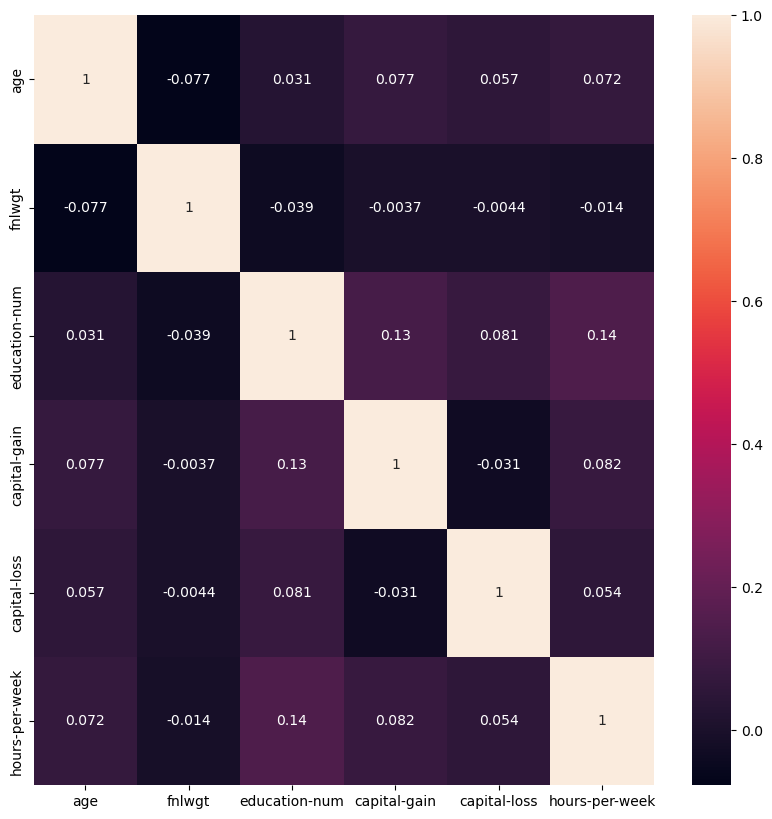

In [87]:
corr=raw_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)


* The column education is just a string representation of the column education-num. We will drop the education column.
* The variables workClass, occupation, native-country have missing values. We will replace the missing values in each column with the most_frequent occurring value of that column.

In [88]:
for i in num_attributes.columns:
    print(i,end=" : ")
    print(raw_data[i].unique())
    print("*"*125)
    

age : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
*****************************************************************************************************************************
fnlwgt : [ 77516  83311 215646 ... 173449  89686 350977]
*****************************************************************************************************************************
education-num : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
*****************************************************************************************************************************
capital-gain : [ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  

In [89]:
for i in cat_attributes.columns:
    print(i,end=" : ")
    print(raw_data[i].unique())
    print("*"*125)

workClass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
*****************************************************************************************************************************
education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
*****************************************************************************************************************************
marital-status : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
*****************************************************************************************************************************
occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-i

<Axes: >

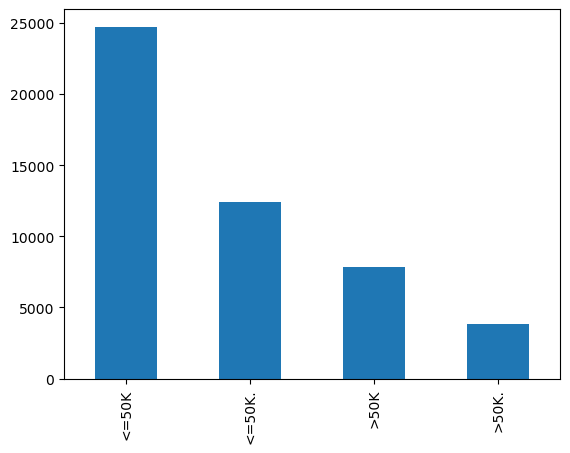

In [90]:
raw_data['income'].value_counts().plot(kind='bar')

In [91]:
raw_data['income'] = raw_data['income'].replace(['<=50K.'], '<=50K')
raw_data['income'] = raw_data['income'].replace(['>50K.'], '>50K')

<Axes: >

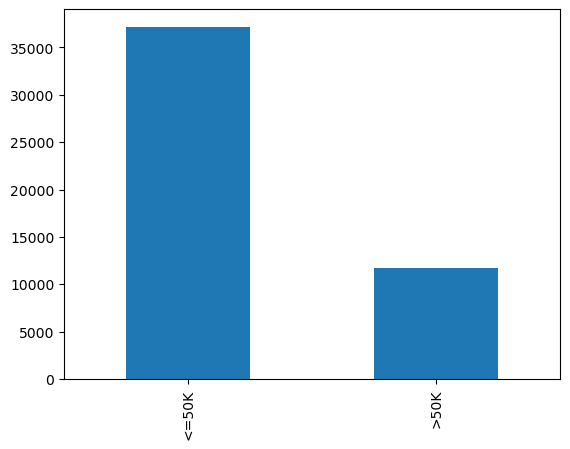

In [92]:
raw_data['income'].value_counts().plot(kind='bar')

In [93]:
print("% of values are <=50K =",raw_data['income'].value_counts()[0]/raw_data.shape[0]*100)

% of values are <=50K = 76.07182343065395


In [94]:
print("% of values are >50K =",raw_data['income'].value_counts()[1]/raw_data.shape[0]*100)

% of values are >50K = 23.928176569346054


##### As per above visualization of target variable we can see the ratio is imbalanced.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Transport-moving'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Machine-op-inspct'),
  Text(10, 0, 'Tech-support'),
  Text(11, 0, 'Protective-serv'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

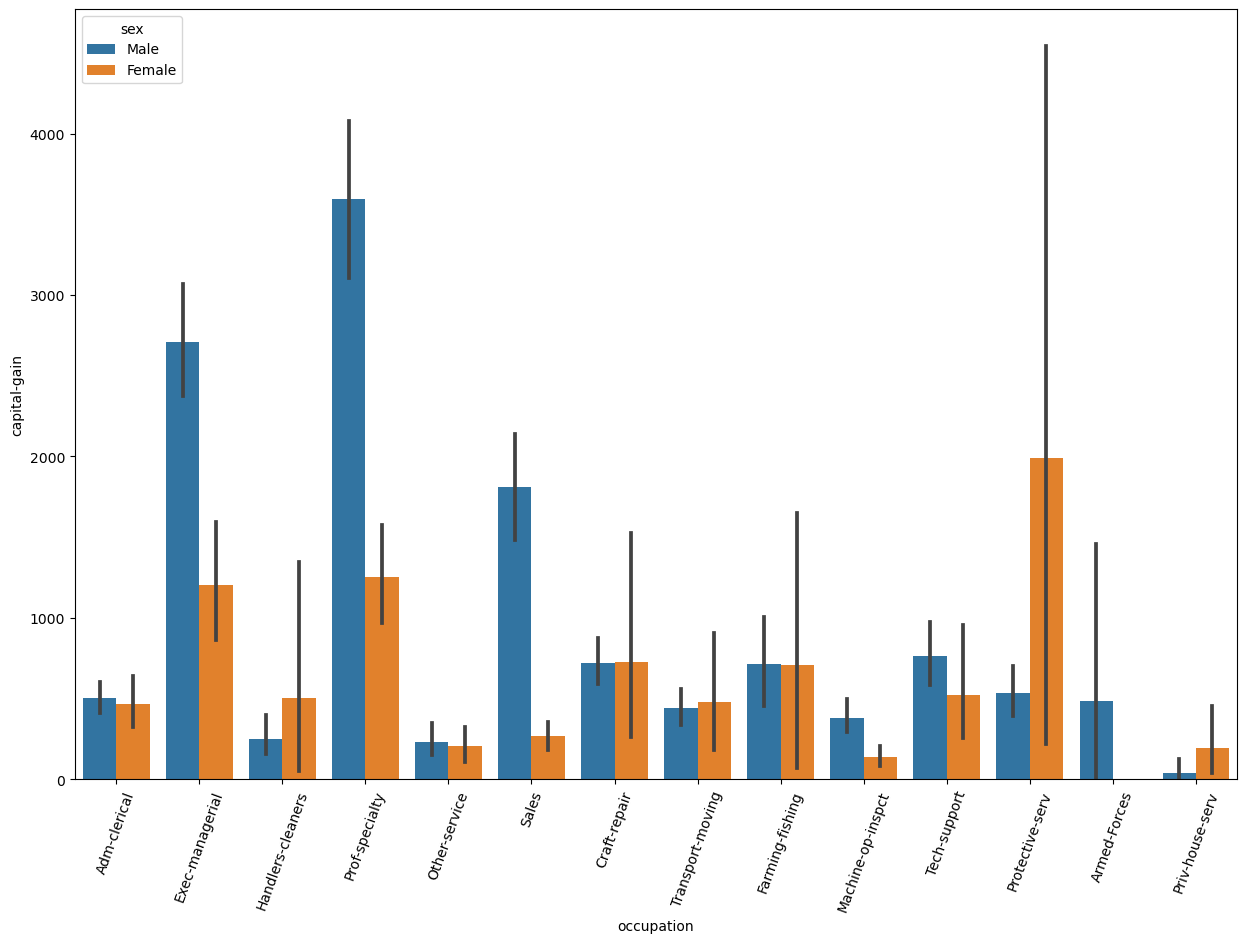

In [95]:
plt.figure(figsize=(15,10))
sns.barplot(x='occupation',y='capital-gain',data=raw_data,hue='sex')
plt.xticks(rotation=70)
##Checking the distribution of Capital_gain and  Occupation as per gender##

In [96]:
raw_data.columns

Index(['age', 'workClass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

<Axes: xlabel='education', ylabel='hours-per-week'>

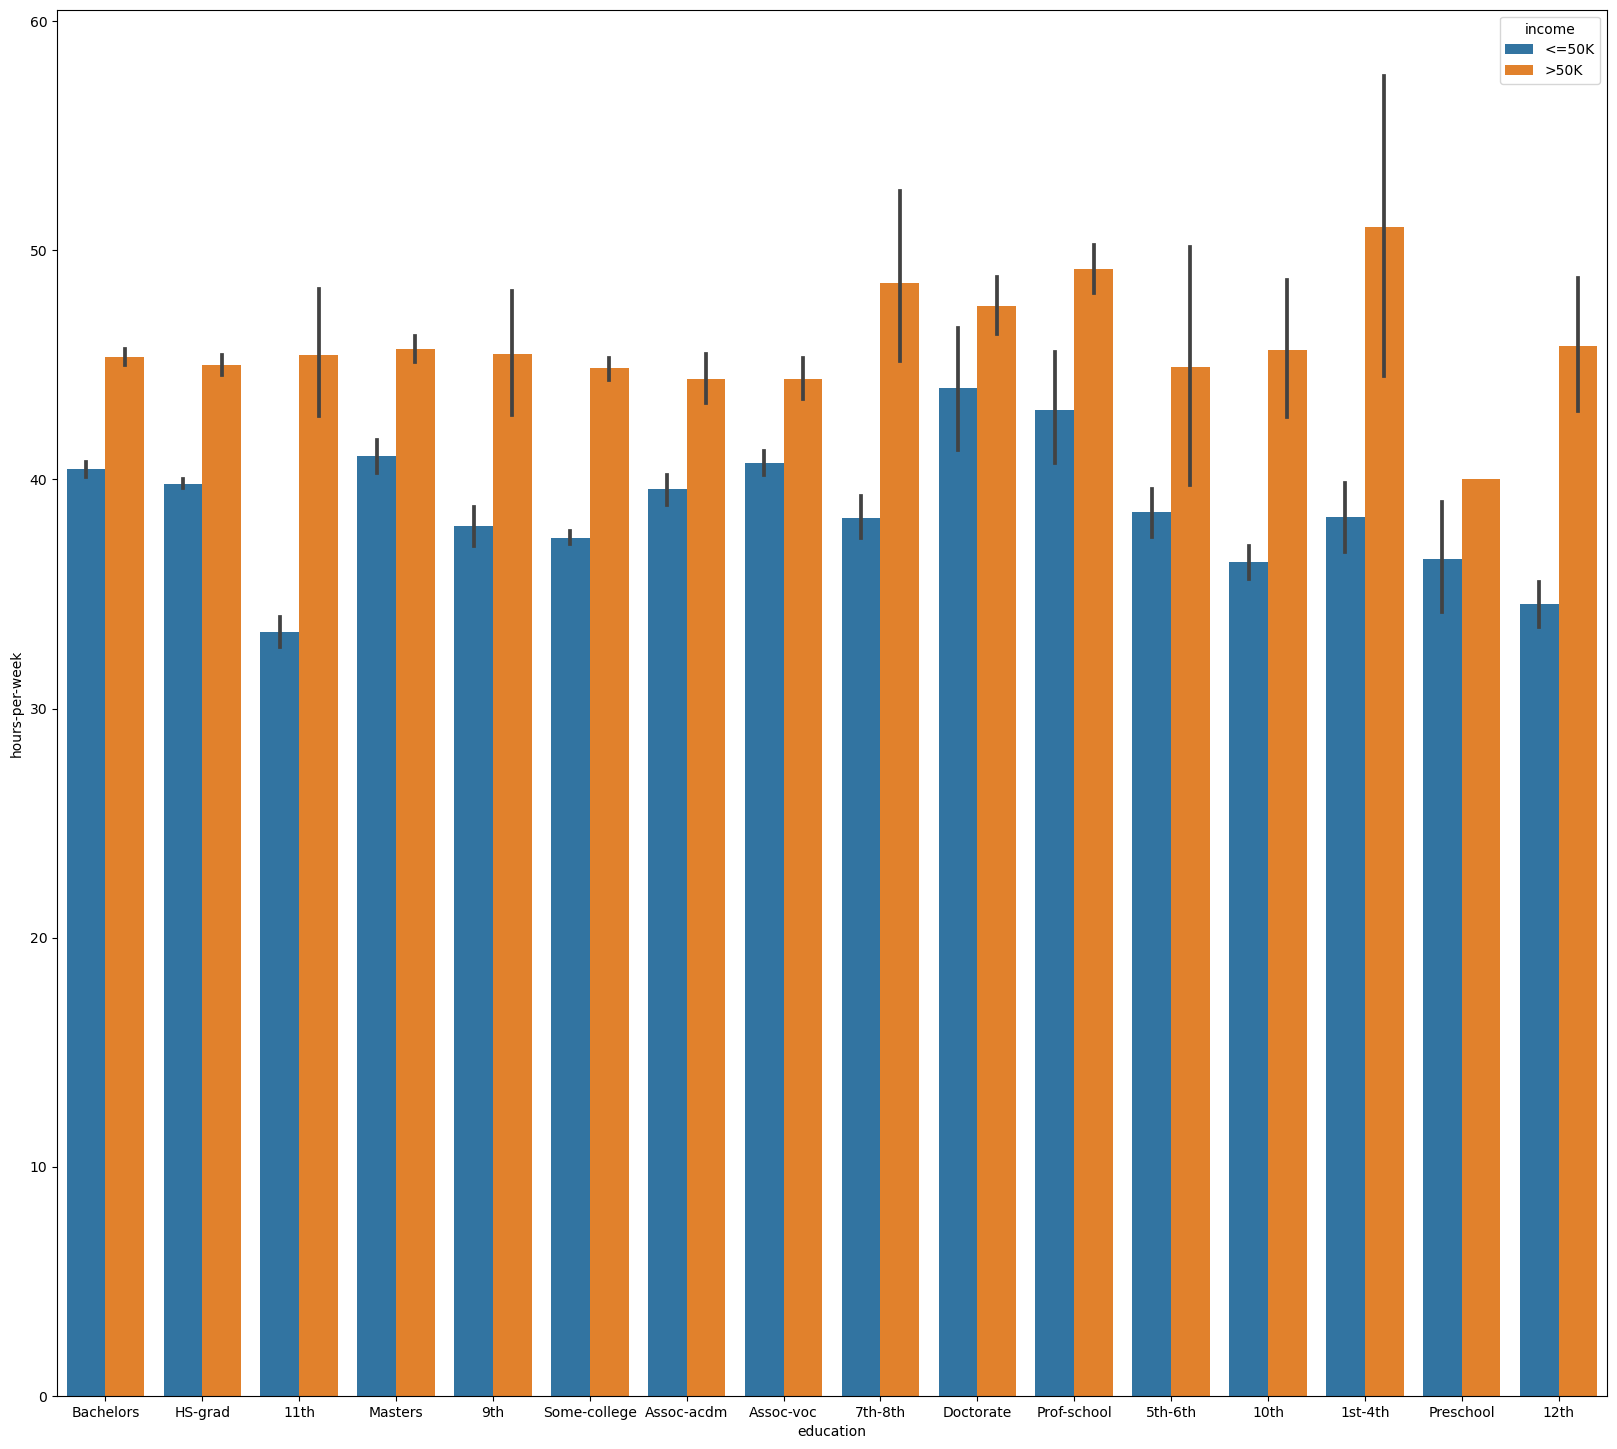

In [97]:
plt.figure(figsize=(20,18))
sns.barplot(x='education',y='hours-per-week',data=raw_data,hue='income')
##Checking the distribution of Education and  Hours_per_week as gender###

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,LabelEncoder,OneHotEncoder

In [99]:
raw_data.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [100]:
le = LabelEncoder() # label encoder 
raw_data['income']=le.fit_transform(raw_data['income']) 


In [101]:
raw_data.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [102]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workClass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 5.8+ MB


In [103]:
raw_data.drop(['fnlwgt', 'education'], axis=1, inplace=True)

### Creating pipelines

In [104]:
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

In [105]:
cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder())
    
])

In [106]:
numerical_cols=['age', 'education-num', 'capital-gain', 'capital-loss','hours-per-week']

In [107]:
categorical_cols=['workClass', 'marital-status', 'occupation','relationship', 'race', 'native-country','sex']

In [108]:
preprocessor=ColumnTransformer([
            ('num_pipeline',num_pipeline,numerical_cols),
            ('cat_pipeline',cat_pipeline,categorical_cols)
            ])

In [109]:
X=raw_data.drop(['income'],axis=1)
Y=raw_data[['income']]

In [110]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [111]:
X_test

,age,workClass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
14116,56,Federal-gov,14,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,48,United-States
3926,47,Local-gov,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
27085,18,NaN,10,Never-married,NaN,Own-child,White,Male,0,0,30,United-States
13375,44,Private,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
5031,44,Private,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,45,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
15558,40,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1887,40,United-States
25453,17,Private,6,Never-married,Other-service,Own-child,White,Male,0,0,12,United-States
8723,51,Private,10,Married-spouse-absent,Transport-moving,Unmarried,White,Male,0,0,40,United-States
11899,39,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States


In [112]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [114]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [115]:
y_pred=lr.predict(X_test)


In [116]:
print("Accuracy score:",accuracy_score(y_test,y_pred))

Accuracy score: 0.8302054186855934


In [117]:
lr_report=classification_report(y_test,y_pred)

In [118]:
print(lr_report)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     11222
           1       0.72      0.45      0.56      3431

    accuracy                           0.83     14653
   macro avg       0.78      0.70      0.73     14653
weighted avg       0.82      0.83      0.82     14653



In [119]:
lr_conf_mat = confusion_matrix(y_test,y_pred)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[10608   614]
 [ 1874  1557]]


Text(50.722222222222214, 0.5, 'Actual classes')

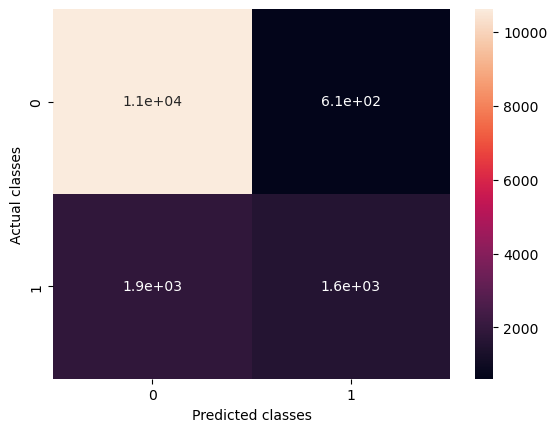

In [120]:
cfm = confusion_matrix(y_test, y_pred, labels=[0,1])
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

In [121]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

#importing the ric and auc from sklearn and predect the x_test and checking the roc_auc_score
print(roc_auc_score(y_test,lr.predict(X_test)))

0.6995448005414273


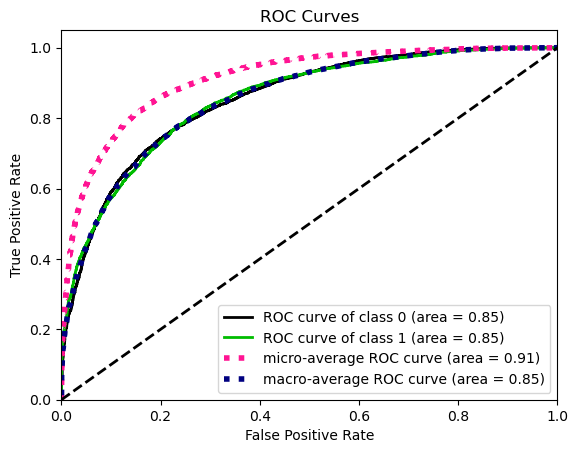

In [122]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_probas = lr.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

### Fine Tuning the model


In [123]:
# penalty specifies the norm in the penalization
penalty = ['l1', 'l2']
# C is the inverese of regularization parameter
C = np.logspace(-5, 5, 50)
random_state=[0]
#solver= ['liblinear']
#class_weight=[{0:0.2392, 1:0.7607},None]
# creating a dictionary of hyperparameters
hyperparameters = dict(C=C, penalty=penalty, 
                  random_state=random_state)

In [124]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator = lr, param_grid = hyperparameters, 
                   cv=5)
best_model = clf.fit(X_train, y_train)
print('Best Penalty:', best_model.best_estimator_.get_params() ['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.029470517025518096


In [125]:
best_predicted_values = best_model.predict(X_test)
accuracy_score(best_predicted_values, y_test)

0.830956118201051

In [126]:
#SMOTE data for train set
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
print(y_train.value_counts())



income
0         25933
1         25933
dtype: int64


In [127]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator = lr, param_grid = hyperparameters, 
                   cv=5)
best_model = clf.fit(X_train, y_train)
print('Best Penalty:', best_model.best_estimator_.get_params() ['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.2648552168552958


In [128]:
best_predicted_values = best_model.predict(X_test)
accuracy_score(best_predicted_values, y_test)

0.770831911553948

In [129]:
balanced_lr_report=classification_report(y_test,best_predicted_values)

In [130]:
print(balanced_lr_report)

              precision    recall  f1-score   support

           0       0.91      0.78      0.84     11222
           1       0.51      0.76      0.61      3431

    accuracy                           0.77     14653
   macro avg       0.71      0.77      0.72     14653
weighted avg       0.82      0.77      0.78     14653



In [131]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workClass       46043 non-null  object
 2   education-num   48842 non-null  int64 
 3   marital-status  48842 non-null  object
 4   occupation      46033 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  47985 non-null  object
 12  income          48842 non-null  int32 
dtypes: int32(1), int64(5), object(7)
memory usage: 5.0+ MB
